# 1. Preparation

## 1.1 Import data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import classification_report 
import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score, precision_score
from sklearn import metrics
import scikitplot as skplt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from IPython.display import Image
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
import scikitplot as skplt
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder



In [2]:
df = pd.read_csv('Training Data.csv', index_col=0)
df.head().T

Id,1,2,3,4,5
Income,1303834,7574516,3991815,6256451,5768871
Age,23,40,66,41,47
Experience,3,10,4,2,11
Married/Single,single,single,married,single,single
House_Ownership,rented,rented,rented,rented,rented
Car_Ownership,no,no,no,yes,no
Profession,Mechanical_engineer,Software_Developer,Technical_writer,Software_Developer,Civil_servant
CITY,Rewa,Parbhani,Alappuzha,Bhubaneswar,Tiruchirappalli[10]
STATE,Madhya_Pradesh,Maharashtra,Kerala,Odisha,Tamil_Nadu
CURRENT_JOB_YRS,3,9,4,2,3


## 1.2 Data information

### 1.2.1 Data type

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 252000 entries, 1 to 252000
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Income             252000 non-null  int64 
 1   Age                252000 non-null  int64 
 2   Experience         252000 non-null  int64 
 3   Married/Single     252000 non-null  object
 4   House_Ownership    252000 non-null  object
 5   Car_Ownership      252000 non-null  object
 6   Profession         252000 non-null  object
 7   CITY               252000 non-null  object
 8   STATE              252000 non-null  object
 9   CURRENT_JOB_YRS    252000 non-null  int64 
 10  CURRENT_HOUSE_YRS  252000 non-null  int64 
 11  Risk_Flag          252000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 25.0+ MB


### 1.2.2 Missing value detection

In [4]:
df.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### 1.2.3 The number of unique values

In [5]:
df.nunique()

Income               41920
Age                     59
Experience              21
Married/Single           2
House_Ownership          3
Car_Ownership            2
Profession              51
CITY                   317
STATE                   29
CURRENT_JOB_YRS         15
CURRENT_HOUSE_YRS        5
Risk_Flag                2
dtype: int64

## 1.3 Data preparation

### 1.3.1 Create dummy variables

In [3]:
categorical_columns = ['Married/Single', 'House_Ownership', 'Car_Ownership', 'Profession', 'CITY', 'STATE']
dummies = pd.get_dummies(df[categorical_columns], drop_first=True)
pd.set_option("display.max_columns", None)
dummies.head()

,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY_Mathura,CITY_Mau,CITY_Medininagar,CITY_Meerut,CITY_Mehsana,CITY_M

### 1.3.2 Replace categorical variable to dummy

In [28]:
new_numerical_columns = ['Income', 'Age', 'Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']
data = pd.concat((df[new_numerical_columns], dummies), axis=1)
data.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY

### 1.3.3 Income regularization

In [29]:
minmax = MinMaxScaler()
data['Income'] = minmax.fit_transform(df[['Income']])
data.head()

,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag,Married/Single_single,House_Ownership_owned,House_Ownership_rented,Car_Ownership_yes,Profession_Analyst,Profession_Architect,Profession_Army_officer,Profession_Artist,Profession_Aviator,Profession_Biomedical_Engineer,Profession_Chartered_Accountant,Profession_Chef,Profession_Chemical_engineer,Profession_Civil_engineer,Profession_Civil_servant,Profession_Comedian,Profession_Computer_hardware_engineer,Profession_Computer_operator,Profession_Consultant,Profession_Dentist,Profession_Design_Engineer,Profession_Designer,Profession_Drafter,Profession_Economist,Profession_Engineer,Profession_Fashion_Designer,Profession_Financial_Analyst,Profession_Firefighter,Profession_Flight_attendant,Profession_Geologist,Profession_Graphic_Designer,Profession_Hotel_Manager,Profession_Industrial_Engineer,Profession_Lawyer,Profession_Librarian,Profession_Magistrate,Profession_Mechanical_engineer,Profession_Microbiologist,Profession_Official,Profession_Petroleum_Engineer,Profession_Physician,Profession_Police_officer,Profession_Politician,Profession_Psychologist,Profession_Scientist,Profession_Secretary,Profession_Software_Developer,Profession_Statistician,Profession_Surgeon,Profession_Surveyor,Profession_Technical_writer,Profession_Technician,Profession_Technology_specialist,Profession_Web_designer,CITY_Agartala,CITY_Agra,CITY_Ahmedabad,CITY_Ahmednagar,CITY_Aizawl,CITY_Ajmer,CITY_Akola,CITY_Alappuzha,CITY_Aligarh,CITY_Allahabad,CITY_Alwar,CITY_Amaravati,CITY_Ambala,CITY_Ambarnath,CITY_Ambattur,CITY_Amravati,CITY_Amritsar,CITY_Amroha,CITY_Anand,CITY_Anantapur,CITY_Anantapuram[24],CITY_Arrah,CITY_Asansol,CITY_Aurangabad,CITY_Aurangabad[39],CITY_Avadi,CITY_Bahraich,CITY_Ballia,CITY_Bally,CITY_Bangalore,CITY_Baranagar,CITY_Barasat,CITY_Bardhaman,CITY_Bareilly,CITY_Bathinda,CITY_Begusarai,CITY_Belgaum,CITY_Bellary,CITY_Berhampore,CITY_Berhampur,CITY_Bettiah[33],CITY_Bhagalpur,CITY_Bhalswa_Jahangir_Pur,CITY_Bharatpur,CITY_Bhatpara,CITY_Bhavnagar,CITY_Bhilai,CITY_Bhilwara,CITY_Bhimavaram,CITY_Bhind,CITY_Bhiwandi,CITY_Bhiwani,CITY_Bhopal,CITY_Bhubaneswar,CITY_Bhusawal,CITY_Bidar,CITY_Bidhannagar,CITY_Bihar_Sharif,CITY_Bijapur,CITY_Bikaner,CITY_Bilaspur,CITY_Bokaro,CITY_Bongaigaon,CITY_Bulandshahr,CITY_Burhanpur,CITY_Buxar[37],CITY_Chandigarh_city,CITY_Chandrapur,CITY_Chapra,CITY_Chennai,CITY_Chinsurah,CITY_Chittoor[28],CITY_Coimbatore,CITY_Cuttack,CITY_Danapur,CITY_Darbhanga,CITY_Davanagere,CITY_Dehradun,CITY_Dehri[30],CITY_Delhi_city,CITY_Deoghar,CITY_Dewas,CITY_Dhanbad,CITY_Dharmavaram,CITY_Dhule,CITY_Dibrugarh,CITY_Dindigul,CITY_Durg,CITY_Durgapur,CITY_Eluru[25],CITY_Erode[17],CITY_Etawah,CITY_Faridabad,CITY_Farrukhabad,CITY_Fatehpur,CITY_Firozabad,CITY_Gandhidham,CITY_Gandhinagar,CITY_Gangtok,CITY_Gaya,CITY_Ghaziabad,CITY_Giridih,CITY_Gopalpur,CITY_Gorakhpur,CITY_Gudivada,CITY_Gulbarga,CITY_Guna,CITY_Guntakal,CITY_Guntur[13],CITY_Gurgaon,CITY_Guwahati,CITY_Gwalior,CITY_Hajipur[31],CITY_Haldia,CITY_Hapur,CITY_Haridwar,CITY_Hazaribagh,CITY_Hindupur,CITY_Hospet,CITY_Hosur,CITY_Howrah,CITY_Hubliâ€“Dharwad,CITY_Hyderabad,CITY_Ichalkaranji,CITY_Imphal,CITY_Indore,CITY_Jabalpur,CITY_Jaipur,CITY_Jalandhar,CITY_Jalgaon,CITY_Jalna,CITY_Jamalpur[36],CITY_Jammu[16],CITY_Jamnagar,CITY_Jamshedpur,CITY_Jaunpur,CITY_Jehanabad[38],CITY_Jhansi,CITY_Jodhpur,CITY_Jorhat,CITY_Junagadh,CITY_Kadapa[23],CITY_Kakinada,CITY_Kalyan-Dombivli,CITY_Kamarhati,CITY_Kanpur,CITY_Karaikudi,CITY_Karawal_Nagar,CITY_Karimnagar,CITY_Karnal,CITY_Katihar,CITY_Katni,CITY_Kavali,CITY_Khammam,CITY_Khandwa,CITY_Kharagpur,"CITY_Khora,_Ghaziabad",CITY_Kirari_Suleman_Nagar,CITY_Kishanganj[35],CITY_Kochi,CITY_Kolhapur,CITY_Kolkata,CITY_Kollam,CITY_Korba,CITY_Kota[6],CITY_Kottayam,CITY_Kozhikode,CITY_Kulti,CITY_Kumbakonam,CITY_Kurnool[18],CITY_Latur,CITY_Loni,CITY_Lucknow,CITY_Ludhiana,CITY_Machilipatnam,CITY_Madanapalle,CITY_Madhyamgram,CITY_Madurai,CITY_Mahbubnagar,CITY_Maheshtala,CITY_Malda,CITY_Malegaon,CITY_Mangalore,CITY_Mango,CITY

### 1.3.4 Data partition

In [30]:
print(data[data['Risk_Flag']==0].shape)
print(data[data['Risk_Flag']==1].shape)

(221004, 404)
(30996, 404)


In [7]:
# Full data set
'''
df_class1_over = data[data['Risk_Flag']==1].sample(221004, replace=True, random_state=0)
balanced_df = pd.concat([data[data['Risk_Flag']==0], df_class1_over], axis=0)

X = balanced_df.drop(columns='Risk_Flag', axis=1)
y = balanced_df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
'''

"\ndf_class1_over = data[data['Risk_Flag']==1].sample(221004, replace=True, random_state=0)\nbalanced_df = pd.concat([data[data['Risk_Flag']==0], df_class1_over], axis=0)\n\nX = balanced_df.drop(columns='Risk_Flag', axis=1)\ny = balanced_df['Risk_Flag']\n\nX_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)\n"

In [31]:
# Reduce the amount of calculation

df_class0_over = data[data['Risk_Flag']==0].sample(30996, random_state=0)
balanced_df = pd.concat([df_class0_over, data[data['Risk_Flag']==1]], axis=0)

X = balanced_df.drop(columns='Risk_Flag', axis=1)
y = balanced_df['Risk_Flag']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
''''''

''

# 2. EDA

### 2.1 Find outliers

<AxesSubplot:>

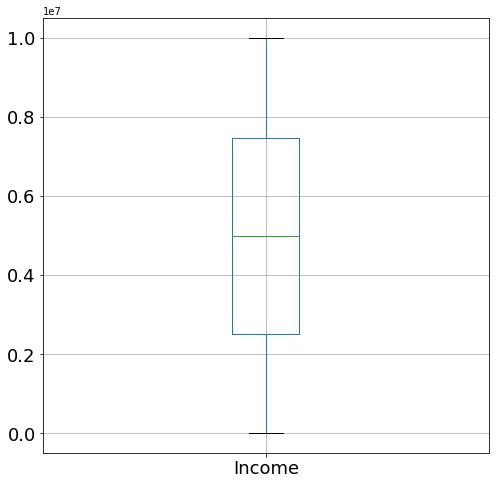

In [9]:
df.boxplot(column=['Income'], figsize=(8, 8),fontsize=18)

<AxesSubplot:>

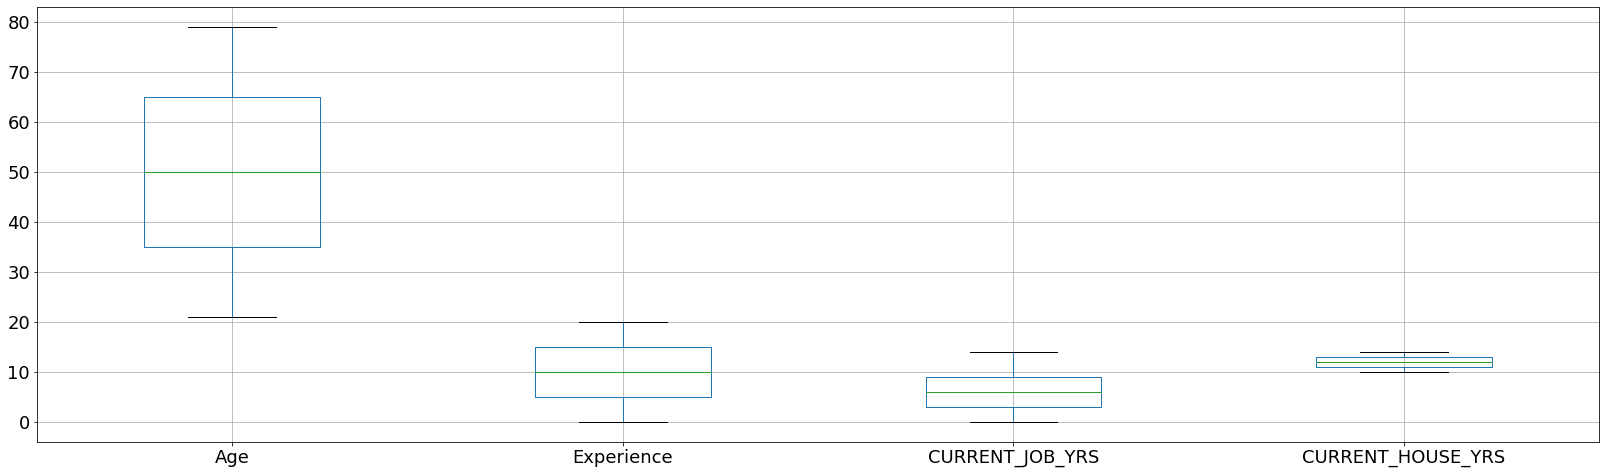

In [10]:
df.boxplot(column=['Age', 'Experience', 'CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS'], figsize=(28, 8),fontsize=18)

### 2.2 Density plot of numerical variables

c:\Users\ysr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ysr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\ysr\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displ

Text(0.5, 1.0, 'Distribution of CURRENT_HOUSE_YRS')

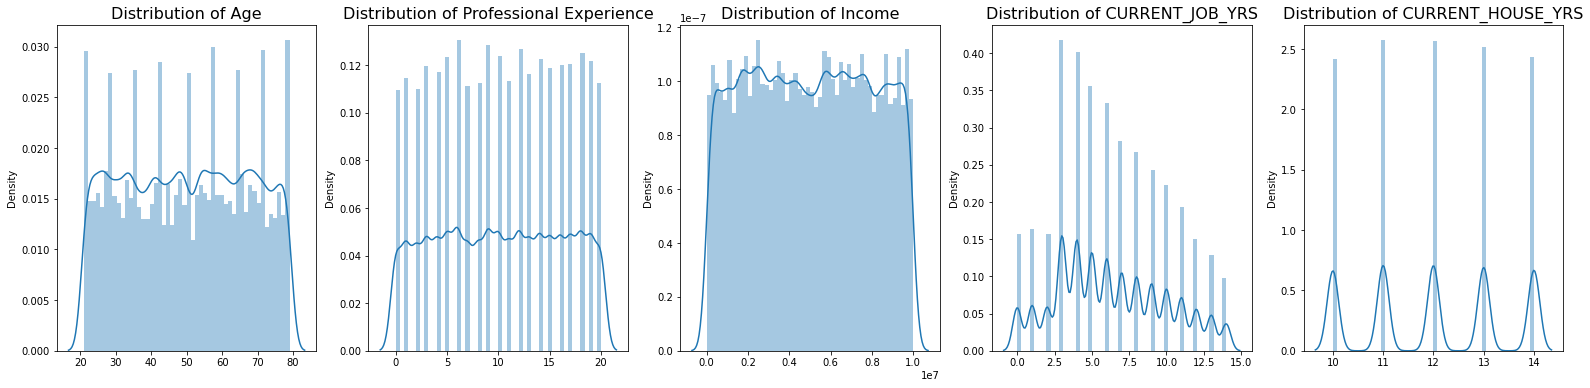

In [12]:
fig, axs = plt.subplots(1,5, figsize= (27,6))
age_denplot=sns.distplot(x=df.Age, ax= axs[0])
age_denplot.set_title("Distribution of Age", fontsize=16)

exp_denplot=sns.distplot(x=df.Experience, ax= axs[1])
exp_denplot.set_title("Distribution of Professional Experience", fontsize=16)

inc_denplot=sns.distplot(x=df.Income,ax=axs[2] )
inc_denplot.set_title("Distribution of Income", fontsize=16)

job_denplot=sns.distplot(x=df.CURRENT_JOB_YRS,ax=axs[3] )
job_denplot.set_title("Distribution of CURRENT_JOB_YRS", fontsize=16)

hou_denplot=sns.distplot(x=df.CURRENT_HOUSE_YRS,ax=axs[4] ) 
hou_denplot.set_title("Distribution of CURRENT_HOUSE_YRS", fontsize=16)

Text(0, 0.5, 'Risk Rate')

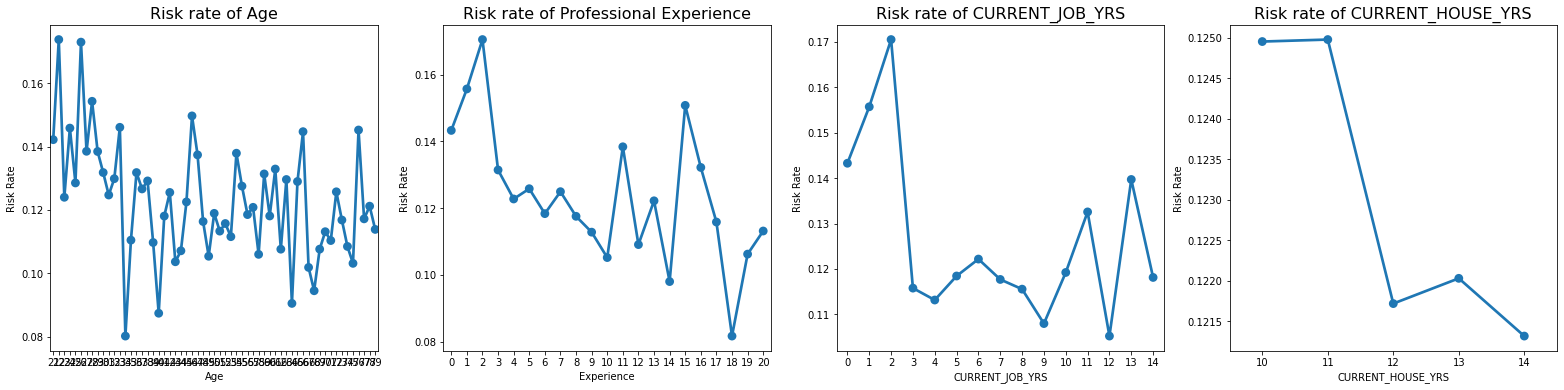

In [13]:
fig, axs = plt.subplots(1,4, figsize= (27,6))

a = pd.DataFrame(df.groupby('Age')['Risk_Flag'].mean())
age_denplot = sns.pointplot(y = a.Risk_Flag,x=a.index,ax= axs[0])
age_denplot.set_title("Risk rate of Age", fontsize=16)
age_denplot.set_ylabel('Risk Rate')

b = pd.DataFrame(df.groupby('Experience')['Risk_Flag'].mean())
exp_denplot = sns.pointplot(y = b.Risk_Flag,x=b.index,ax= axs[1])
exp_denplot.set_title("Risk rate of Professional Experience", fontsize=16)
exp_denplot.set_ylabel('Risk Rate')



c = pd.DataFrame(df.groupby('CURRENT_JOB_YRS')['Risk_Flag'].mean())
job_denplot = sns.pointplot(y = c.Risk_Flag,x=c.index,ax= axs[2])
job_denplot.set_title("Risk rate of CURRENT_JOB_YRS", fontsize=16)
job_denplot.set_ylabel('Risk Rate')
# hou_denplot=sns.kdeplot(x=df.CURRENT_HOUSE_YRS,ax=axs[4] ,hue=df.Risk_Flag) 
d = pd.DataFrame(df.groupby('CURRENT_HOUSE_YRS')['Risk_Flag'].mean())
hou_denplot = sns.pointplot(y = d.Risk_Flag,x=d.index,ax= axs[3])
hou_denplot.set_title("Risk rate of CURRENT_HOUSE_YRS", fontsize=16)
hou_denplot.set_ylabel('Risk Rate')


### 2.3 Correlation analysis

<AxesSubplot:>

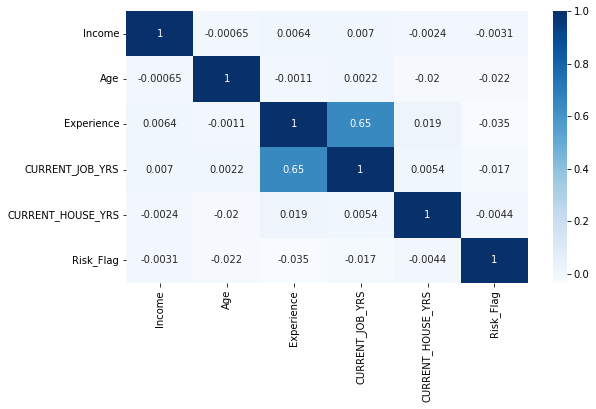

In [14]:
new_numerical_columns = ['Income', 'Age', 'Experience','CURRENT_JOB_YRS', 'CURRENT_HOUSE_YRS', 'Risk_Flag']

plt.figure(figsize=(9, 5))
corr = df[new_numerical_columns].corr()
sns.heatmap(corr, cmap='Blues', annot=True)

### 2.4 Distribution of Defaulter & default rate

Text(0.5, 1.0, 'Total Distribution of Defaulters')

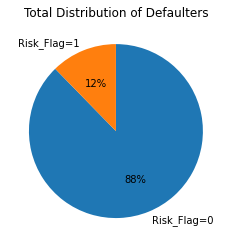

In [15]:
sorted_counts = df['Risk_Flag'].value_counts()
flag = ['Risk_Flag=0', 'Risk_Flag=1'] 
plt.pie(sorted_counts, labels = flag, startangle = 90,
        counterclock = False,autopct='%2.0f%%');
plt.title('Total Distribution of Defaulters')

Text(0, 0.5, 'Default rate(%)')

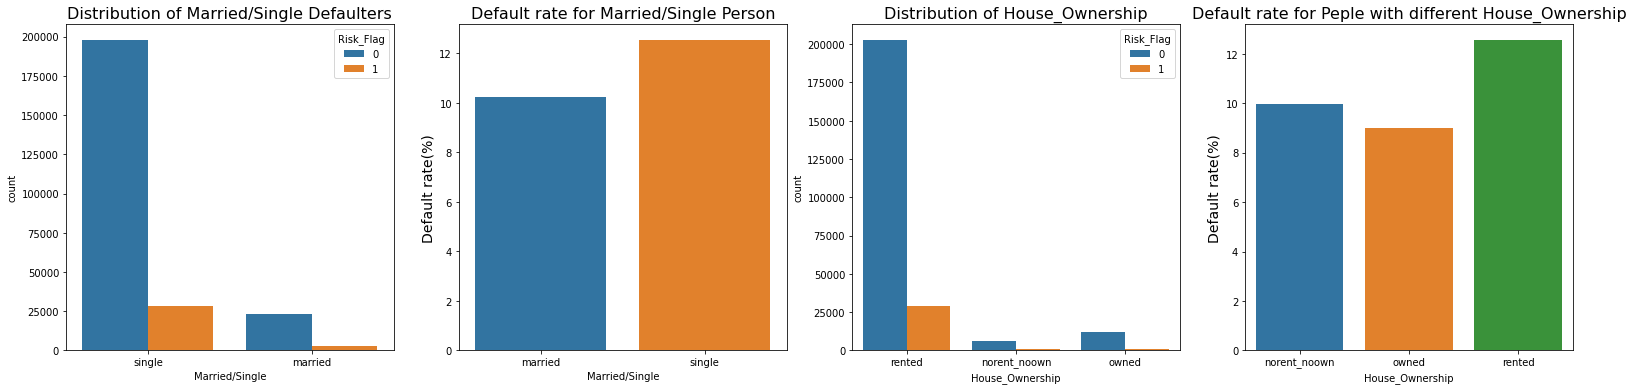

In [16]:
fig, axs = plt.subplots(1,4, figsize= (27,6))

rate_tol_countplot=sns.countplot(x='Married/Single',hue='Risk_Flag',data=df,ax= axs[0])
rate_tol_countplot.set_title('Distribution of Married/Single Defaulters', fontsize=16)

df_tmp = df.groupby('Married/Single')['Risk_Flag'].describe()
rate_tol_plot = sns.barplot(x=df_tmp.index,y=df_tmp['mean']*100,data=df_tmp,ax= axs[1])
rate_tol_plot.set_title("Default rate for Married/Single Person", fontsize=16)
rate_tol_plot.set_ylabel("Default rate(%)", fontsize=14)


rate_house_countplot = sns.countplot(x='House_Ownership',hue='Risk_Flag',data=df,ax= axs[2])
rate_house_countplot.set_title('Distribution of House_Ownership', fontsize=16)

df_tmp1 = df.groupby('House_Ownership')['Risk_Flag'].describe()
rate_house_plot=sns.barplot(x=df_tmp1.index,y=df_tmp1['mean']*100,data=df_tmp1,ax= axs[3])
rate_house_plot.set_title("Default rate for Peple with different House_Ownership", fontsize=16)
rate_house_plot.set_ylabel("Default rate(%)", fontsize=14)



Text(0, 0.5, 'Risk Rate')

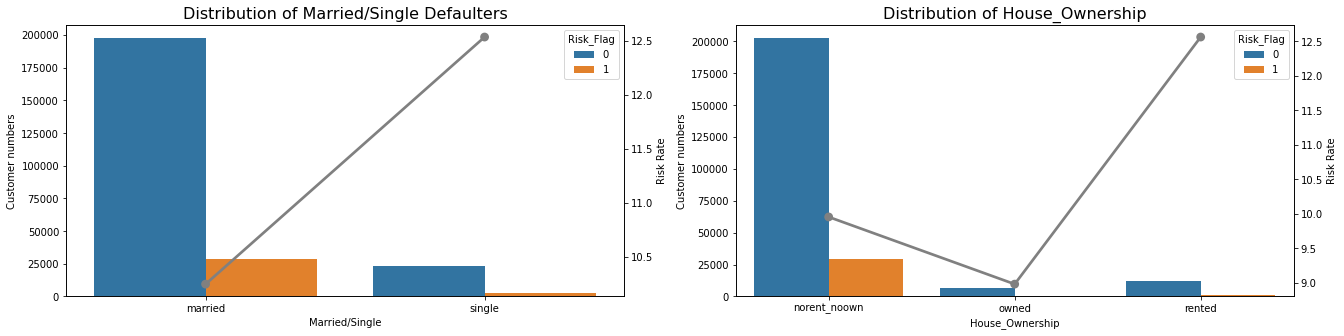

In [17]:
fig = plt.figure(figsize=(22,5))
ax1 = fig.add_subplot(121)
rate_tol_countplot=sns.countplot(x='Married/Single',hue='Risk_Flag',data=df,ax= ax1)
rate_tol_countplot.set_title('Distribution of Married/Single Defaulters', fontsize=16)
rate_tol_countplot.set_ylabel('Customer numbers')
ax2 = ax1.twinx()
df_tmp = df.groupby('Married/Single')['Risk_Flag'].describe()
rate_tol_countplot1 = sns.pointplot(x=df_tmp.index,y=df_tmp['mean']*100,data=df_tmp,ax= ax2,color='grey')
rate_tol_countplot1.set_ylabel('Risk Rate')

ax3 = fig.add_subplot(122)
rate_house_countplot = sns.countplot(x='House_Ownership',hue='Risk_Flag',data=df,ax= ax3)
rate_house_countplot.set_title('Distribution of House_Ownership', fontsize=16)
rate_house_countplot.set_ylabel('Customer numbers')
ax4 = ax3.twinx()
df_tmp1 = df.groupby('House_Ownership')['Risk_Flag'].describe()
rate_tol_countplot1 = sns.pointplot(x=df_tmp1.index,y=df_tmp1['mean']*100,data=df_tmp1,ax= ax4,color='grey')
rate_tol_countplot1.set_ylabel('Risk Rate')


Text(0, 0.5, 'Risk Rate')

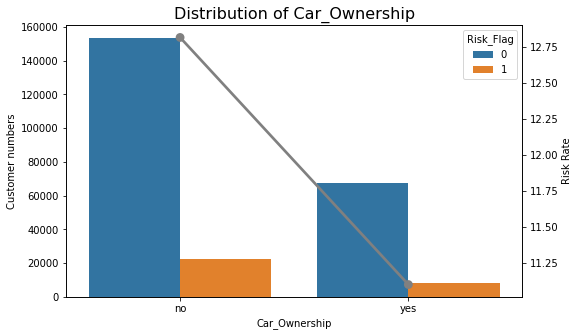

In [18]:
fig = plt.figure(figsize=(18,5))
ax1 = fig.add_subplot(121)
rate_car_countplot=sns.countplot(x='Car_Ownership',hue='Risk_Flag',data=df,ax= ax1)
rate_car_countplot.set_title('Distribution of Car_Ownership',fontsize=16)
rate_car_countplot.set_ylabel('Customer numbers')
ax2 = ax1.twinx()
df_tmp = df.groupby('Car_Ownership')['Risk_Flag'].describe()
rate_tol_countplot1 = sns.pointplot(x=df_tmp.index,y=df_tmp['mean']*100,data=df_tmp,ax= ax2,color='grey')
rate_tol_countplot1.set_ylabel('Risk Rate')

### 2.5 Default rate by Profession & state

Text(0.5, 1.0, 'Top 10 Professions who took loan')

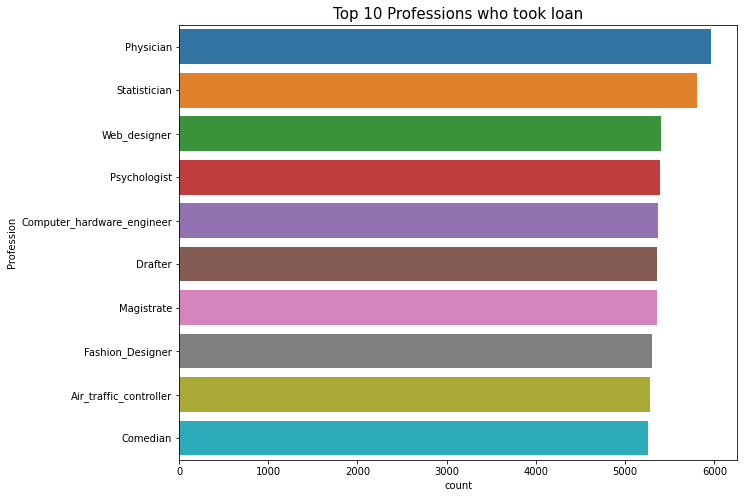

In [19]:
plt.figure(figsize=(10,8))
tmp_data = df['Profession'].value_counts()[:10] 
sns.countplot(y=df.Profession,order = tmp_data.index)
# ,hue=df.Risk_Flag
plt.title('Top 10 Professions who took loan',fontsize=15)

In [20]:
# df_tmp['mean']*100
df_tmp = df.groupby('Profession')['Risk_Flag'].describe()
tmp_dict={}
for i in range(0,len(df_tmp['mean'])):
    tmp_dict[df_tmp['mean'].index[i]] = df_tmp['mean'][i]*100
# tmp_dict
d_order=sorted(tmp_dict.items(),key=lambda x:x[1],reverse=False)
d_order=pd.DataFrame(d_order,columns=('Profession','Default rate(%)'))
top_d_order = d_order[-10:]
lowest_d_order = d_order[:10]

Text(0, 0.5, '')

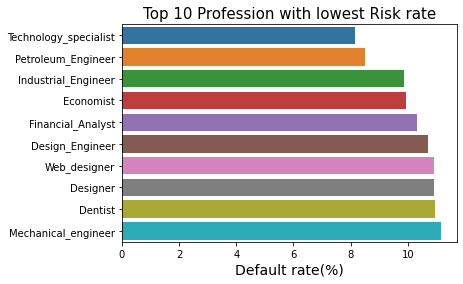

In [21]:
sns.barplot(x='Default rate(%)',y='Profession',data=lowest_d_order.sort_values(by='Default rate(%)', ascending=True),orient='h')
plt.title("Top 10 Profession with lowest Risk rate", fontsize=15)
plt.xlabel("Default rate(%)", fontsize=14)
plt.ylabel("", fontsize=16)

Text(0, 0.5, '')

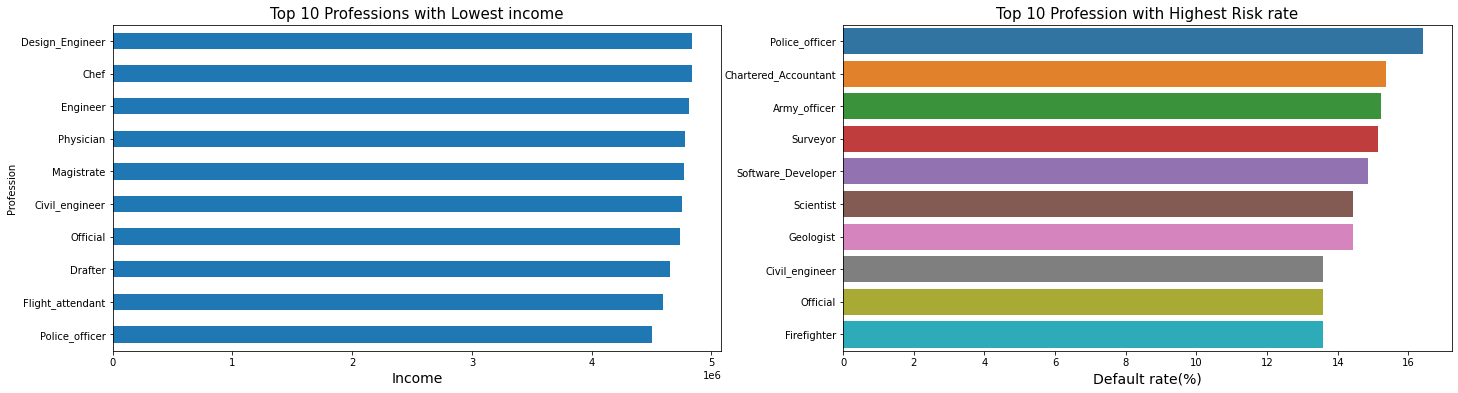

In [22]:
fig, axs = plt.subplots(1,2, figsize= (24,6))

tmp_data = df.groupby('Profession').mean()['Income'].sort_values(ascending=True)[:10]
plt1 = tmp_data.plot(kind='barh',ax= axs[0])
plt1.set_title('Top 10 Professions with Lowest income', fontsize=15)
plt1.set_xlabel("Income", fontsize=14)

plt2 = sns.barplot(x='Default rate(%)',y='Profession',data=top_d_order.sort_values(by='Default rate(%)', ascending=False),orient='h',ax= axs[1])
plt2.set_title("Top 10 Profession with Highest Risk rate", fontsize=15)
plt2.set_xlabel("Default rate(%)", fontsize=14)
plt2.set_ylabel("", fontsize=16)


In [23]:
# 需求大并且risk rate低的人
a = list(df.Profession.value_counts()[:14].index)
b = list(d_order.Profession[:14])
list(set(a).intersection(set(b)))

['Industrial_Engineer',
 'Mechanical_engineer',
 'Drafter',
 'Chemical_engineer',
 'Web_designer']

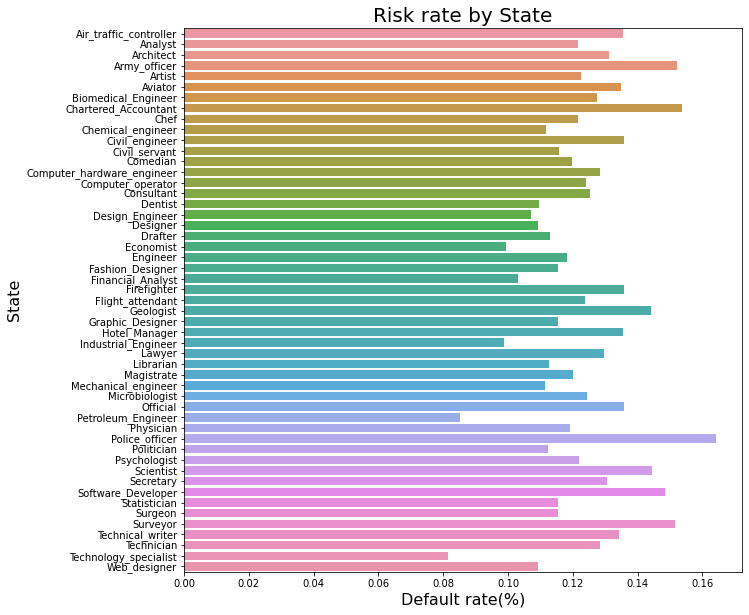

In [24]:
plt.figure(figsize=(10,10))
sns.barplot(x='mean',y=df_tmp.index,data=df_tmp,orient='h')
plt.title("Risk rate by State", fontsize=20)
plt.ylabel("State", fontsize=16)
plt.xlabel("Default rate(%)", fontsize=16)
plt.show()


# 3. Logistic Regression

In [34]:

df_class1_over = data[data['Risk_Flag']==1].sample(221004, replace=True)
balanced_df = pd.concat([data[data['Risk_Flag']==0], df_class1_over], axis=0)
X = balanced_df.drop(columns='Risk_Flag',axis=1)
y = balanced_df['Risk_Flag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
clf_LR=LogisticRegression(random_state=0,solver='lbfgs')
clf_LR.fit(X_train,y_train)

c:\Users\ysr\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [36]:
clf_LR.coef_
# get intercept
clf_LR.intercept_

array([-0.06357694])

In [37]:
# Predict class labels and class probabilities for samples in X_test.
y_pred = clf_LR.predict(X_test)
y_pred=np.where(y_pred>0.65,1,0)
y_pred_prob = clf_LR.predict_proba(X_test)
y_pred_prob.shape

(132603, 2)

In [38]:
## 混淆矩阵
metrics.confusion_matrix(y_test, y_pred)

array([[39590, 26833],
       [27446, 38734]], dtype=int64)

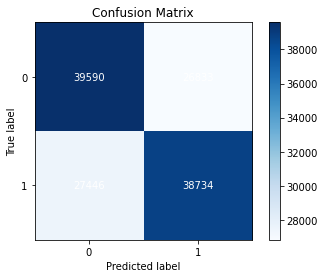

In [39]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred)
plt.show()

In [40]:
ret= classification_report(y_test, y_pred,labels=(0,1), target_names=('not default', 'default'))
print(ret)

              precision    recall  f1-score   support

 not default       0.59      0.60      0.59     66423
     default       0.59      0.59      0.59     66180

    accuracy                           0.59    132603
   macro avg       0.59      0.59      0.59    132603
weighted avg       0.59      0.59      0.59    132603



In [41]:
y_test.value_counts()

0    66423
1    66180
Name: Risk_Flag, dtype: int64

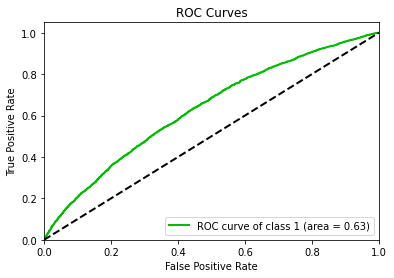

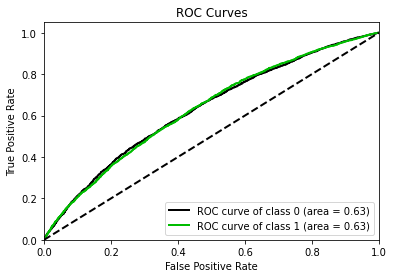

0.6305031637006787

In [42]:
## roc curve and auc score
skplt.metrics.plot_roc(y_test, y_pred_prob, plot_micro=False, plot_macro=False, classes_to_plot=1)
plt.show()
skplt.metrics.plot_roc(y_test, y_pred_prob,plot_micro=False,plot_macro=False)
plt.show()
AUC = metrics.roc_auc_score(y_test, y_pred_prob[:, 1])
AUC

## Cumulative Gain Curve and Lift Curve

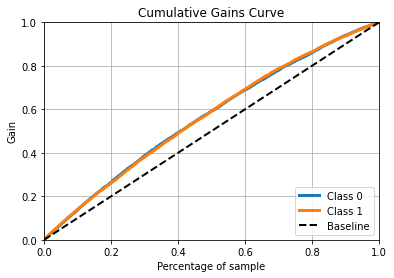

In [43]:
skplt.metrics.plot_cumulative_gain(y_test, y_pred_prob)
plt.show()

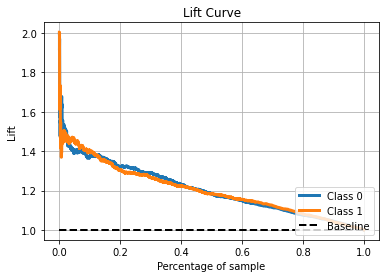

In [44]:
skplt.metrics.plot_lift_curve(y_test, y_pred_prob)
plt.show()

# 4. Decision Tree

In [ ]:
clf = tree.DecisionTreeClassifier(criterion='entropy',random_state=0)

In [ ]:
clf = clf.fit(X_train, y_train)

In [ ]:
clf.feature_importances_

array([1.57723346e-01, 1.11953180e-01, 5.13997703e-02, 4.68317964e-02,
       3.41996636e-02, 9.42525194e-03, 2.71594571e-03, 6.00339416e-03,
       1.44769226e-02, 4.30701453e-03, 3.02712848e-03, 3.11750695e-03,
       4.28635685e-03, 2.26784668e-03, 3.63846232e-03, 4.11871392e-03,
       4.67468345e-03, 3.72063370e-03, 4.35111572e-03, 2.87927304e-03,
       5.16474589e-03, 4.45397972e-03, 4.54939597e-03, 4.59022208e-03,
       3.85405749e-03, 4.46443168e-03, 2.78494364e-03, 3.64915727e-03,
       3.55401298e-03, 2.83241333e-03, 4.64608372e-03, 2.71636653e-03,
       6.45395333e-03, 5.16030699e-03, 3.30842039e-03, 4.83376257e-03,
       4.32635804e-03, 5.33117967e-03, 3.50647626e-03, 3.41036390e-03,
       5.61655713e-03, 4.96436672e-03, 3.36557741e-03, 2.18379624e-03,
       3.95144071e-03, 5.59331864e-03, 3.45431564e-03, 4.09921505e-03,
       2.74031422e-03, 3.59113952e-03, 4.33590861e-03, 3.86971769e-03,
       3.51825336e-03, 3.07879154e-03, 4.98737217e-03, 2.80039189e-03,
      

In [ ]:
clf.get_depth()

136

In [ ]:
Accuracy= clf.score(X_test,y_test)
Accuracy

0.9396619985973168

In [ ]:
clf_plot = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, max_depth=3)
clf_plot = clf_plot.fit(X_train, y_train)

In [ ]:
Accuracy= clf_plot.score(X_test,y_test)
Accuracy

0.5366997730066438

In [ ]:
clf_plot.get_n_leaves()

8

In [ ]:
clf_plot.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

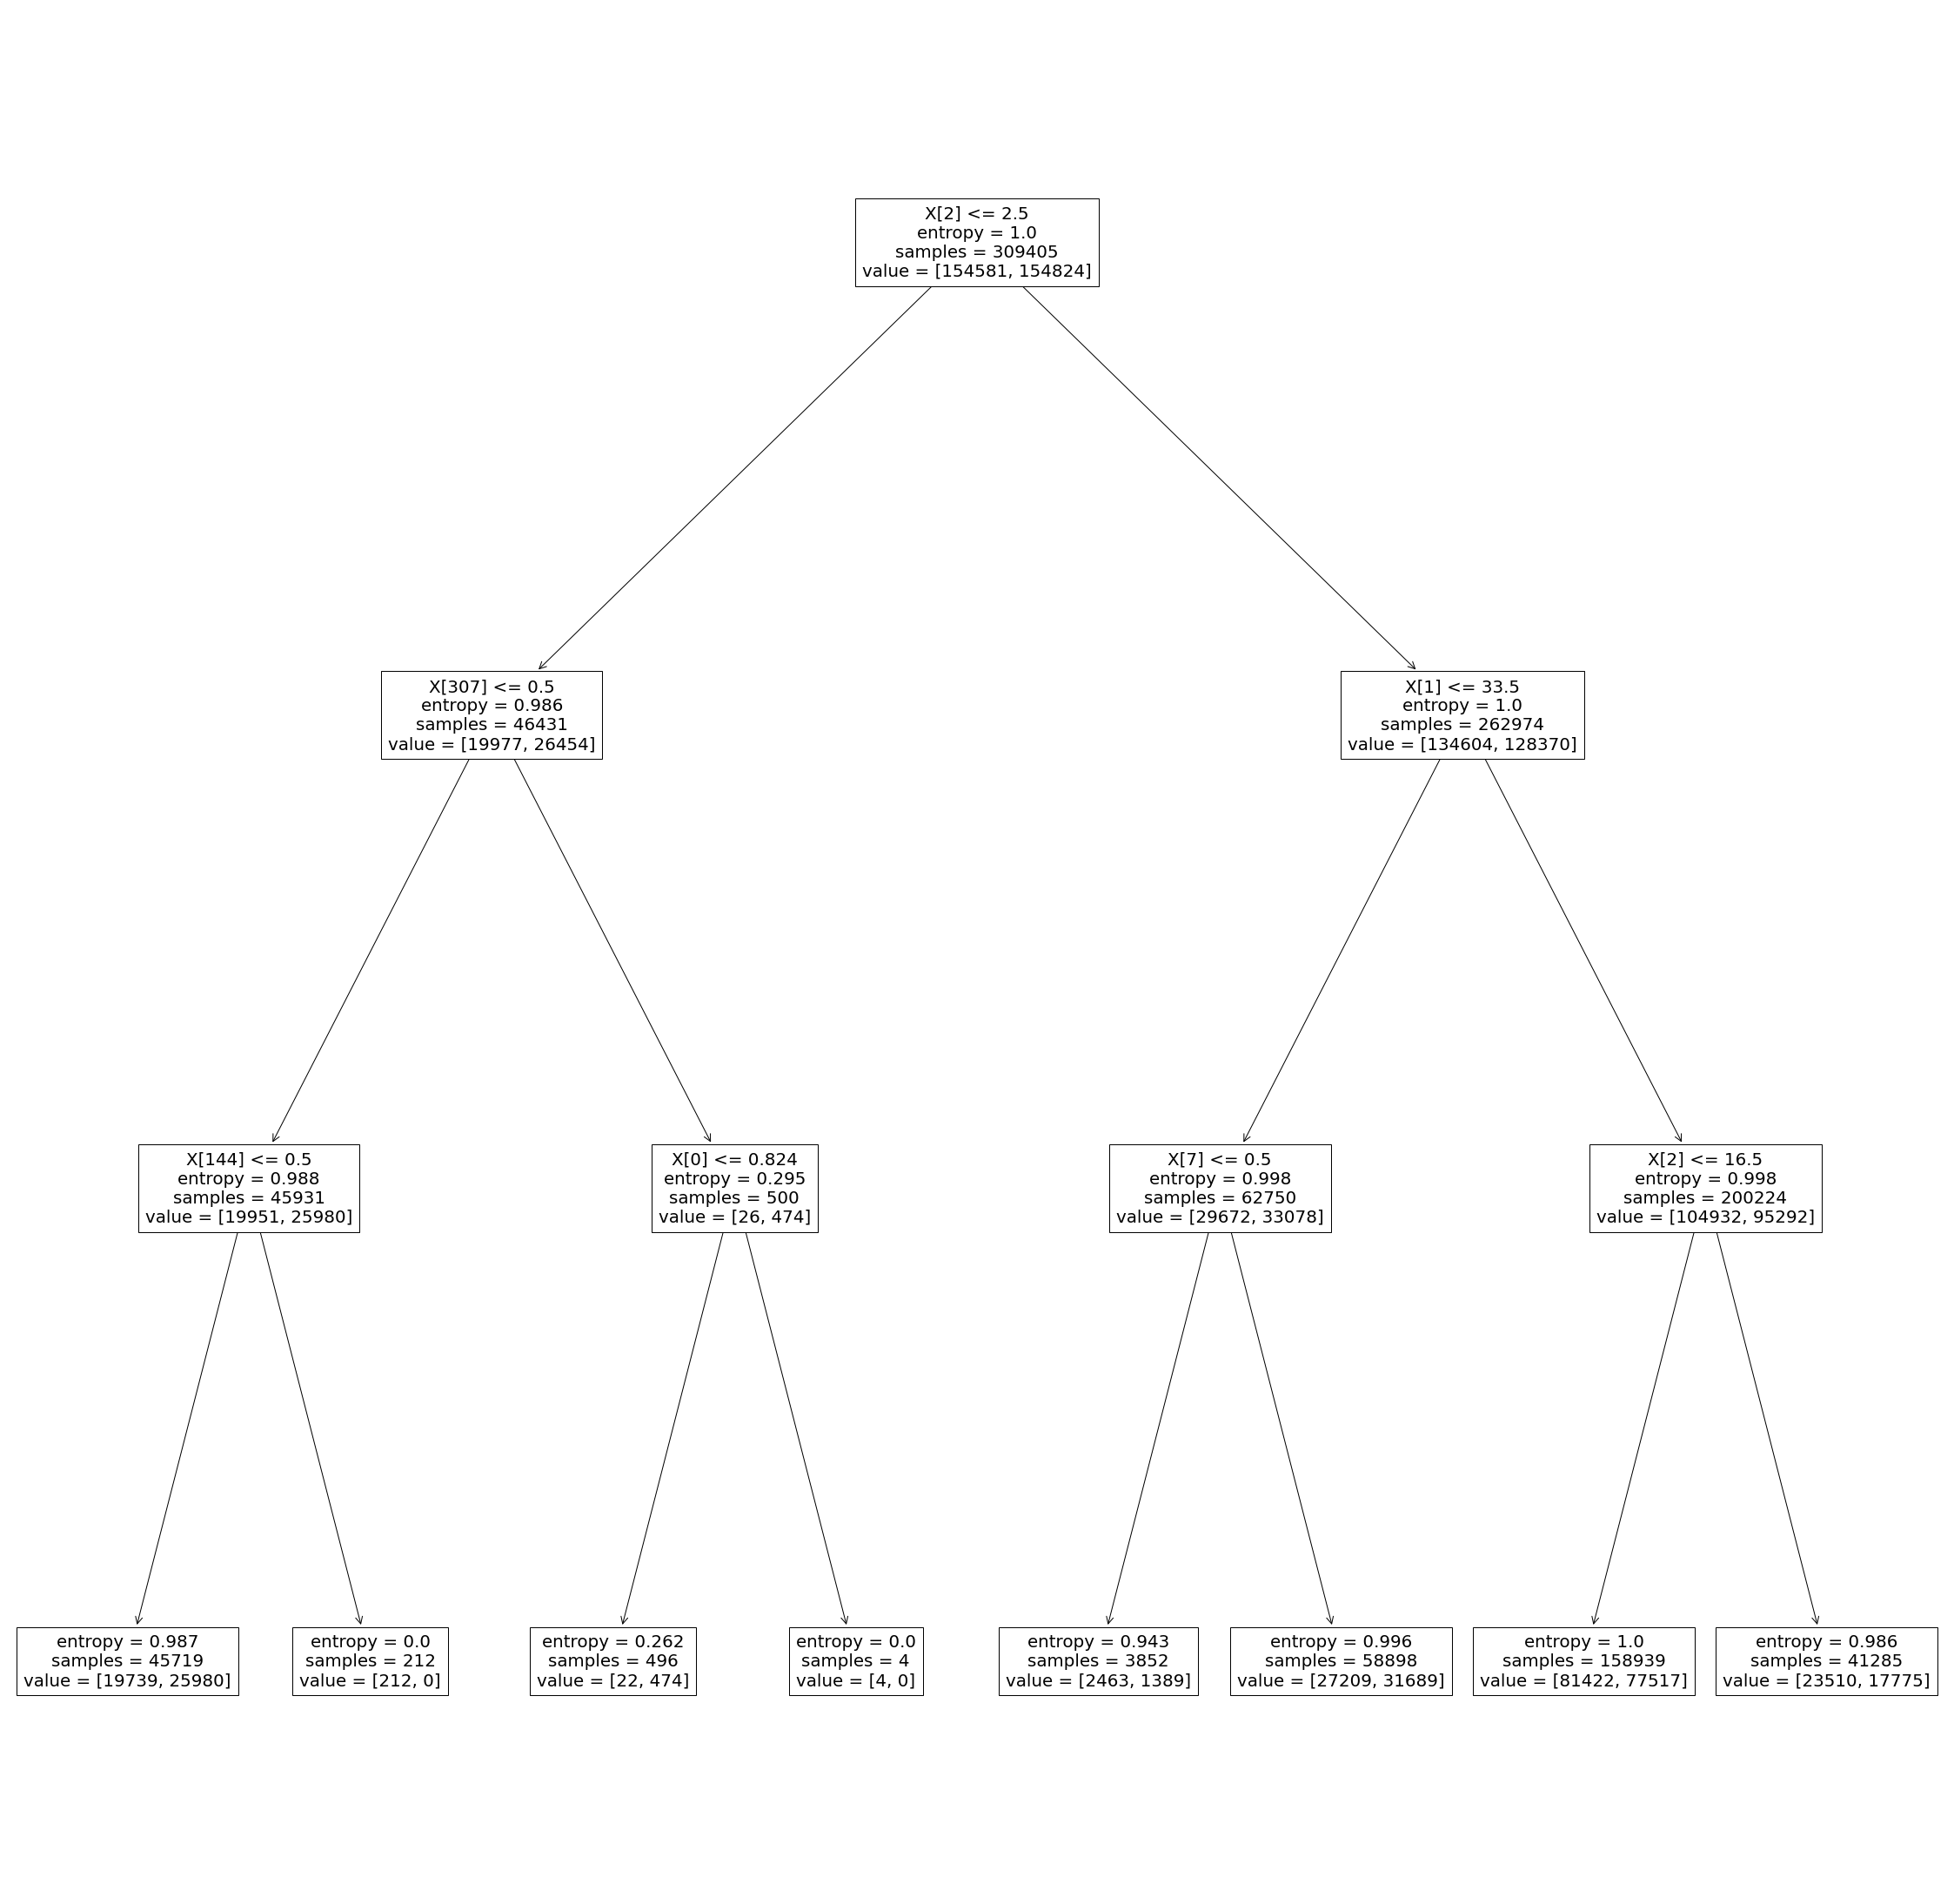

In [ ]:
plt.figure(figsize=(40,40))
tree.plot_tree(clf_plot)
plt.show()

In [ ]:
clf_feature_names = X_train.columns
clf_plot = tree.DecisionTreeClassifier(criterion = 'entropy',random_state = 123,max_depth =3)
clf_plot = clf_plot.fit(X_train, y_train)
feature_name = X_train.columns[:]

[Text(1116.0, 1902.6000000000001, 'node #0\nExperience <= 2.5\nentropy = 1.0\nsamples = 100.0%\nvalue = [0.5, 0.5]'),
 Text(558.0, 1359.0, 'node #1\nCITY_Ratlam <= 0.5\nentropy = 0.986\nsamples = 15.0%\nvalue = [0.43, 0.57]'),
 Text(279.0, 815.4000000000001, 'node #2\nCITY_Dibrugarh <= 0.5\nentropy = 0.988\nsamples = 14.8%\nvalue = [0.434, 0.566]'),
 Text(139.5, 271.79999999999995, 'node #3\nentropy = 0.987\nsamples = 14.8%\nvalue = [0.432, 0.568]'),
 Text(418.5, 271.79999999999995, 'node #4\nentropy = 0.0\nsamples = 0.1%\nvalue = [1.0, 0.0]'),
 Text(837.0, 815.4000000000001, 'node #5\nIncome <= 0.824\nentropy = 0.295\nsamples = 0.2%\nvalue = [0.052, 0.948]'),
 Text(697.5, 271.79999999999995, 'node #6\nentropy = 0.262\nsamples = 0.2%\nvalue = [0.044, 0.956]'),
 Text(976.5, 271.79999999999995, 'node #7\nentropy = 0.0\nsamples = 0.0%\nvalue = [1.0, 0.0]'),
 Text(1674.0, 1359.0, 'node #8\nAge <= 33.5\nentropy = 1.0\nsamples = 85.0%\nvalue = [0.512, 0.488]'),
 Text(1395.0, 815.400000000000

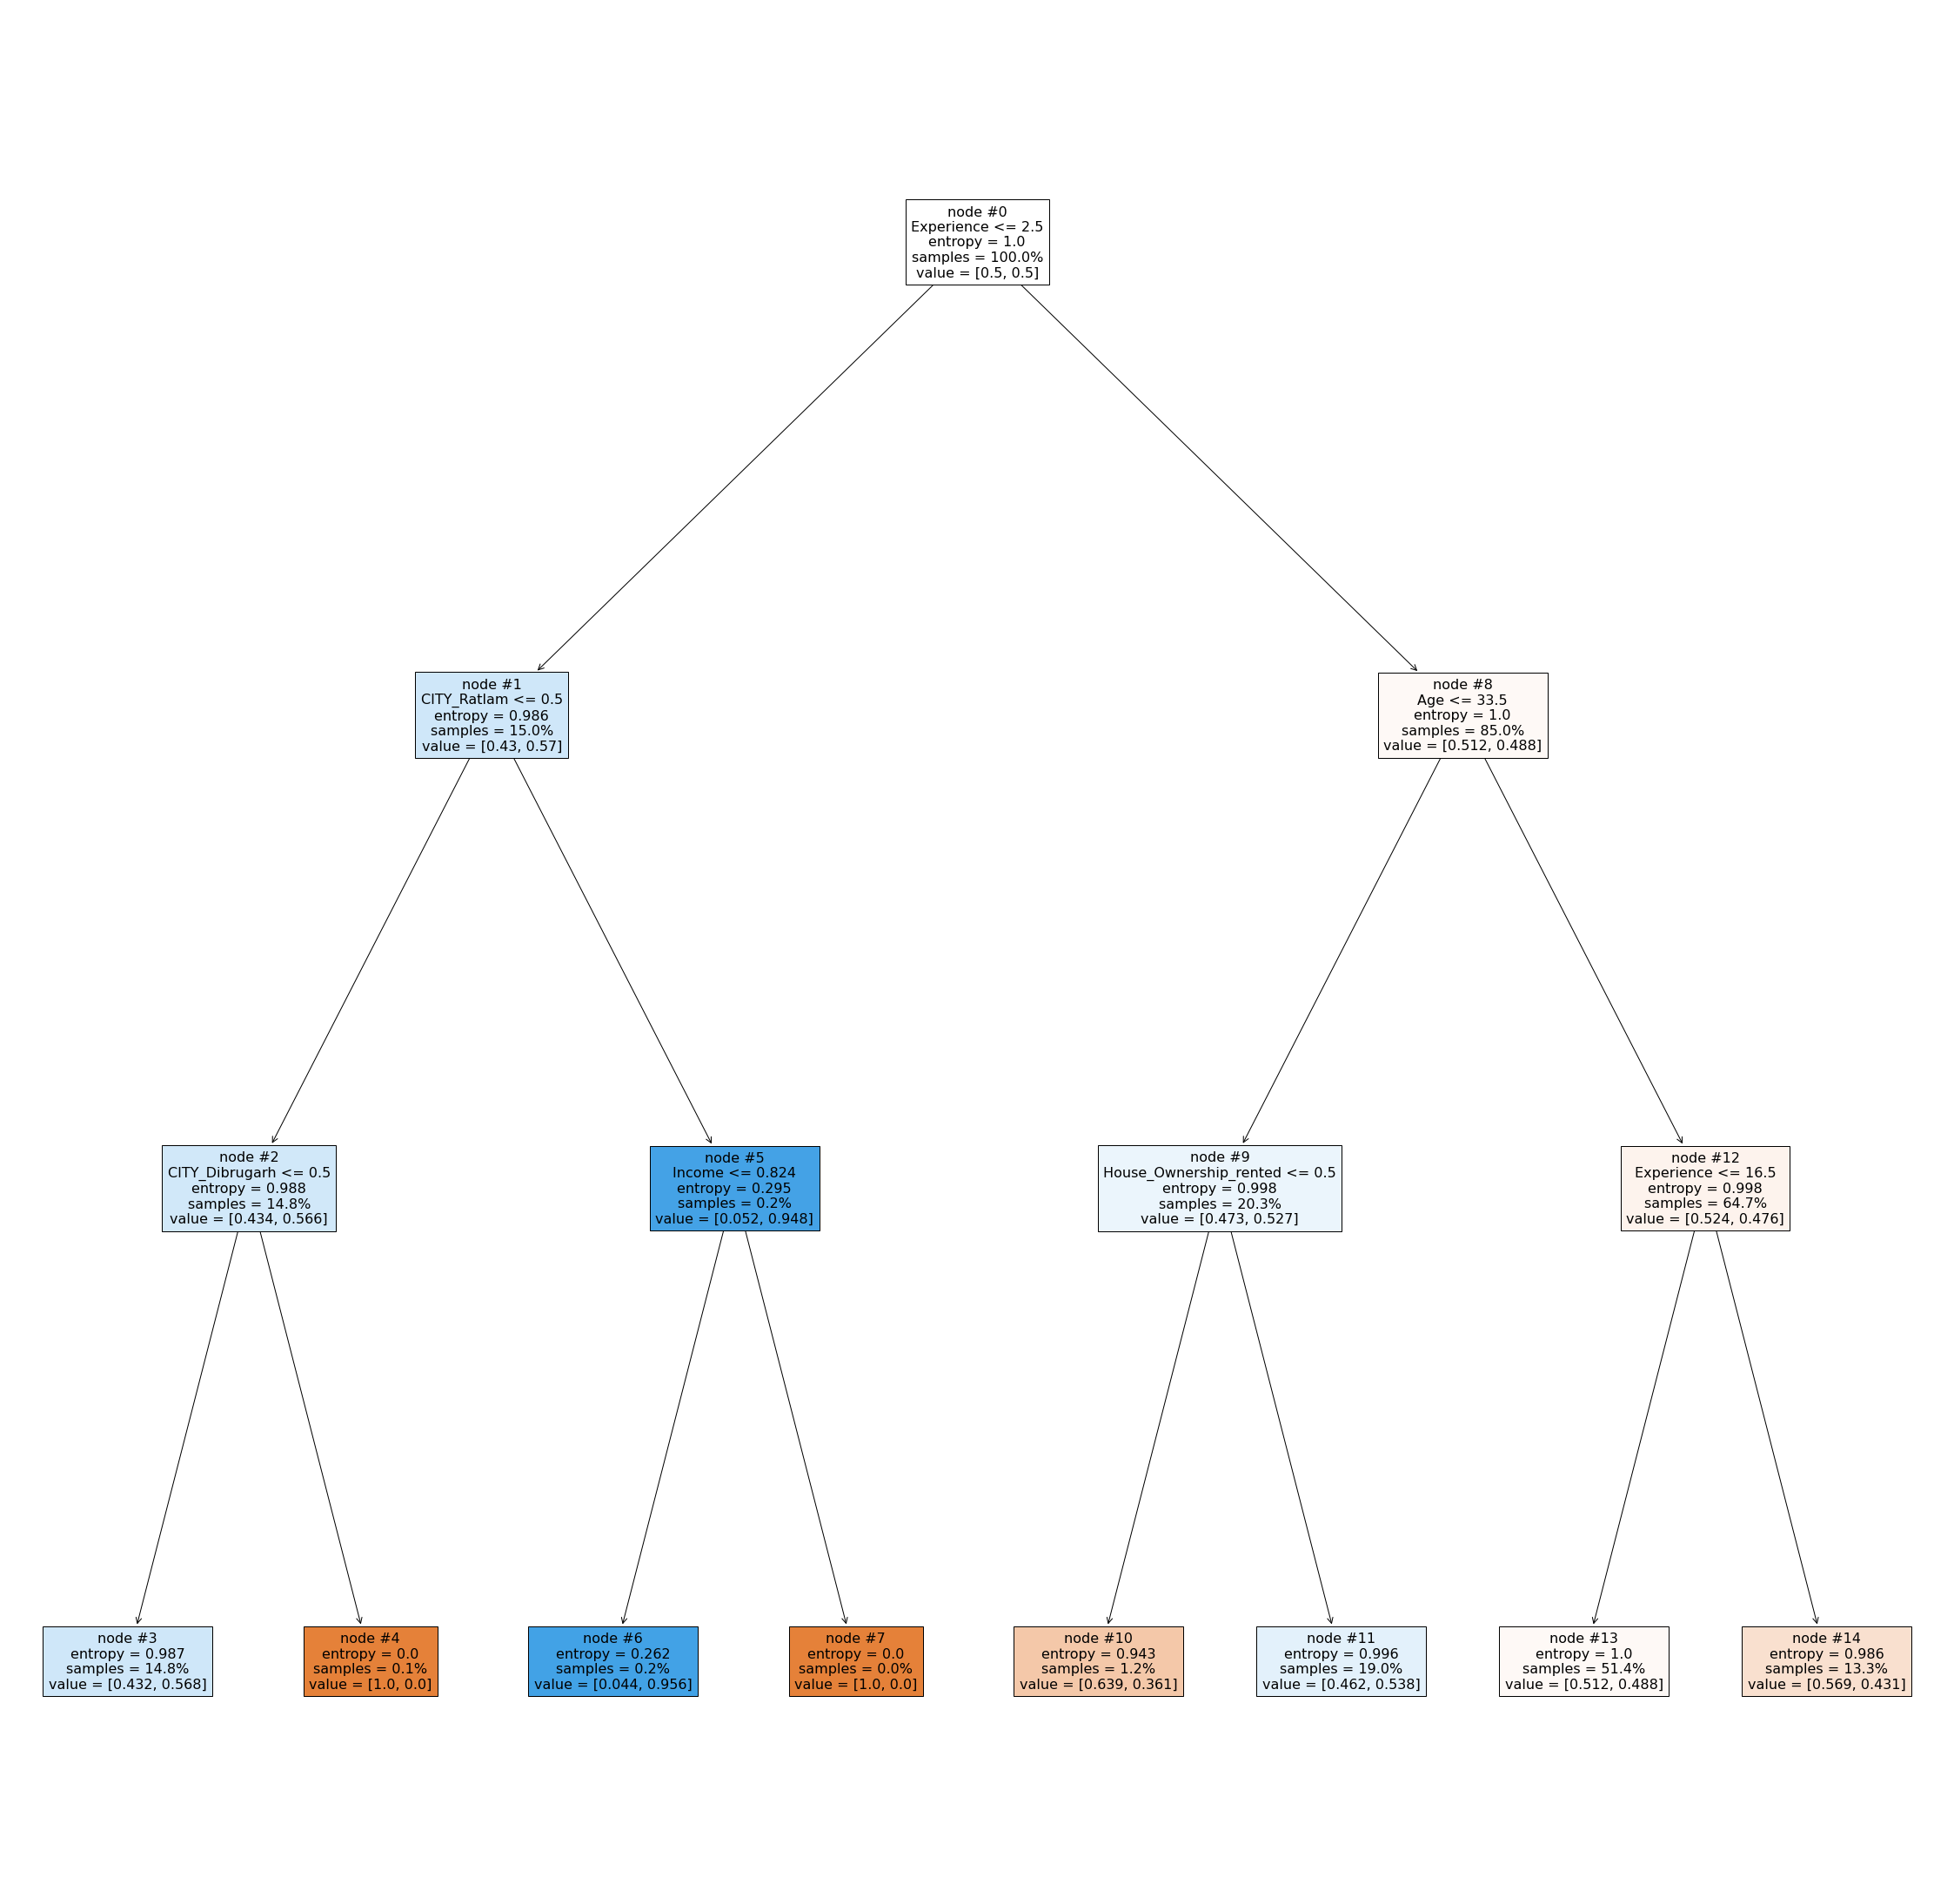

In [ ]:
plt.figure(figsize = (40,40))
tree.plot_tree(clf_plot , feature_names = feature_name , filled = True,
              proportion = True, node_ids = True)

In [ ]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

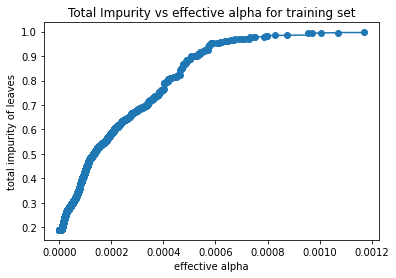

In [ ]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [ ]:
clf_ccp = tree.DecisionTreeClassifier(criterion='entropy', random_state=0, ccp_alpha=0.001)

In [ ]:
cn = confusion_matrix(y_train, clf.predict(X_train))
cn

array([[141452,  13129],
       [    24, 154800]], dtype=int64)

<AxesSubplot:>

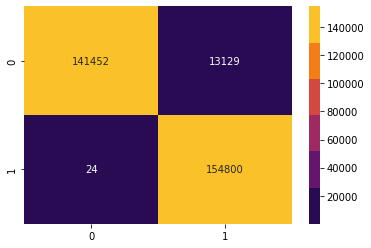

In [ ]:
sns.heatmap(cn,fmt='.20g',cmap = sns.color_palette("inferno"), annot=True)

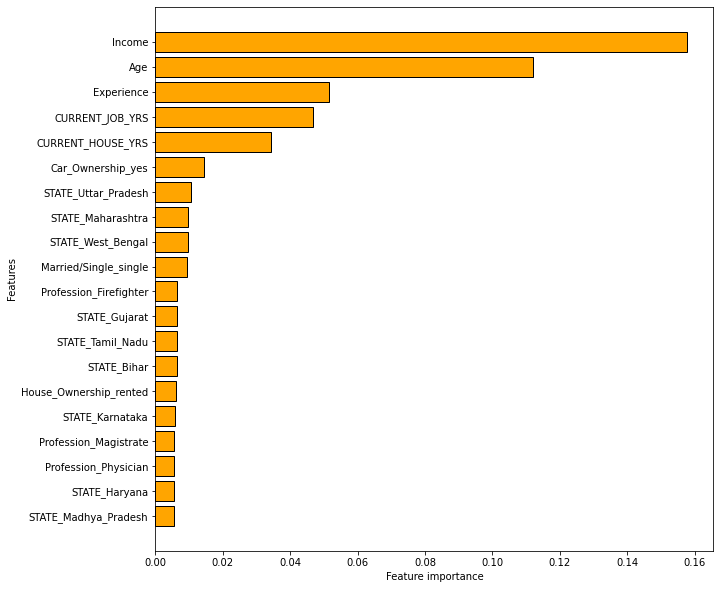

In [ ]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns,'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.barh(df['features'][:n], df['feature_importances'][:n],color = 'orange',edgecolor='black')
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    
    ax.invert_yaxis()
    plt.show()

plot_features(X_train.columns, clf.feature_importances_)

In [ ]:
y_score=clf.fit(X_train,y_train).predict_proba(X_test)

fpr,tpr,thre = roc_curve(y_test,y_score[:,1],pos_label=1)
roc_auc = metrics.auc(fpr,tpr)
mean_tpr=0
mean_fpr=np.linspace(0,1,100)

In [ ]:
label='ROC curve(area = %0.2f)'% roc_auc
label

'ROC curve(area = 0.95)'

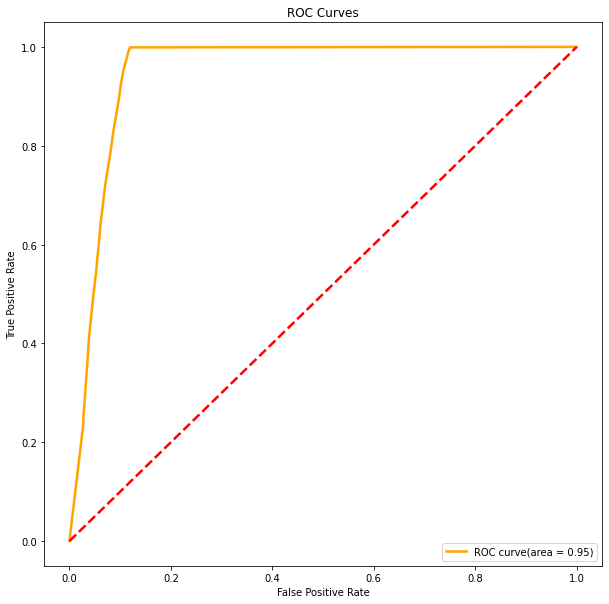

In [ ]:
plt.figure(figsize=(10,10))
plt.plot(fpr,tpr,color='orange',linewidth=2.5,label='ROC curve(area = %0.2f)'% roc_auc)
plt.plot([0,1],[0,1],
         color='red',
         linestyle='--')
plt.title('ROC Curves')
plt.legend(loc='lower right')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.show()

# 5. Random Forest

## 5.1 Instantiate model 1

In [13]:
rfc1 = RandomForestClassifier(random_state=0)
rfc1 = rfc1.fit(X_train, y_train)

### 5.1.1 Model 1 score, Precision, Recall, F1 score, Accuracy, ROC AUC Score

In [14]:
y_pred_1 = rfc1.predict(X_test)
y_pred_prob_1 = rfc1.predict_proba(X_test)

model_1_score = rfc1.score(X_test, y_test)
model_1_Precision = metrics.precision_score(y_test, y_pred_1)
model_1_Recall = metrics.recall_score(y_test, y_pred_1)
model_1_F1 = metrics.f1_score(y_test, y_pred_1)
model_1_Accuracy = metrics.accuracy_score(y_test, y_pred_1)
model_1_ROCAUCScore = roc_auc_score(y_test, y_pred_prob_1[:, 1])

print("Model 1 score: ", model_1_score)
print("Model 1 Precision: ", model_1_Precision)
print("Model 1 Recall: ", model_1_Recall)
print("Model 1 F1 score: ", model_1_F1)
print("Model 1 Accuracy: ", model_1_Accuracy)
print("Model 1 ROC AUC Score: ", model_1_ROCAUCScore)

Model 1 score:  0.8431410504581236
Model 1 Precision:  0.8811561666900519
Model 1 Recall:  0.7985757884028484
Model 1 F1 score:  0.8378360349543059
Model 1 Accuracy:  0.8431410504581236
Model 1 ROC AUC Score:  0.9310391786783494


### 5.1.2 Model 1 confusion matrix

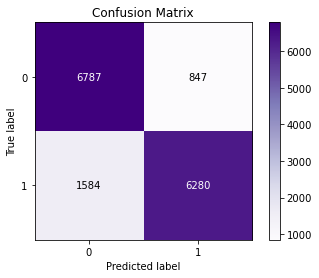

In [37]:
skplt.metrics.plot_confusion_matrix(y_test, y_pred_1, cmap='Purples')
plt.show()

### 5.1.3 Model 1 ROC Curve

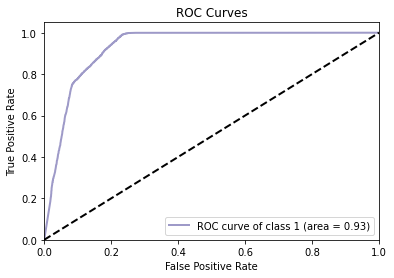

In [32]:
skplt.metrics.plot_roc(y_test, y_pred_prob_1, plot_micro=False, plot_macro=False, classes_to_plot=1, cmap='Purples')
plt.show()

### 5.1.4 Model 1 Feature importances

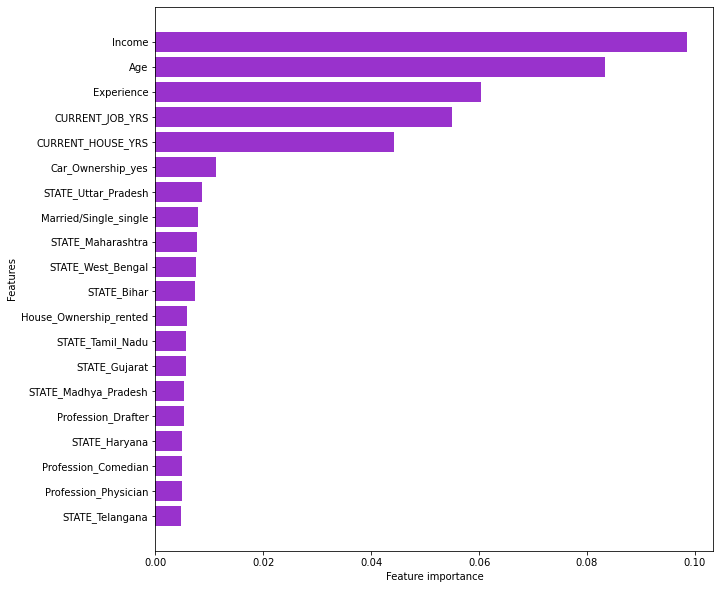

In [41]:
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({'features': columns, 
                        'feature_importances': importances})
          .sort_values('feature_importances', ascending=False)
          .reset_index(drop=True))
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    ax.barh(df['features'][:n], df['feature_importances'][:n], color='#9932CC')
    ax.set_ylabel('Features')
    ax.set_xlabel('Feature importance')
    ax.invert_yaxis()
    plt.show()

plot_features(X_train.columns, rfc1.feature_importances_)

# 6. ANN

## 6.1. Importing Dataset and data preprocessing

In [ ]:
encoder = LabelEncoder()
scaler = MinMaxScaler()

x = pd.read_csv('Training Data.csv')
x = pd.concat([x.loc[x["Risk_Flag"]==0][:30996], x.loc[x["Risk_Flag"]==1]])
y = x.pop("Risk_Flag")
str_x = x.select_dtypes(include=[object])

for i in range(0, len(str_x.columns)):
    x.pop(str_x.columns[i])

x = scaler.fit_transform(x)
x = pd.DataFrame(x)
str_x = str_x.apply(encoder.fit_transform)
str_x = pd.DataFrame(str_x)
str_x.index = x.index
x = pd.concat([x, str_x], axis=1)

x_train, x_val, y_train, y_val = train_test_split(x, y, train_size=0.7, shuffle=True)

## 6.2. Creat ANN model

In [ ]:
classifier = Sequential()
    
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))
    
# Adding the second hidden layer
classifier.add(Dense(units = 64, activation = 'relu'))
    
classifier.add(Dense(units = 32, activation = 'relu'))
    
# Adding the output layer
classifier.add(Dense(units = 1, activation = 'linear'))
    
# Compiling the ANN
classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])

In [ ]:
History = classifier.fit(x = x_train, y = y_train, validation_data=(x_val, y_val), batch_size = 128, epochs = 100, verbose = 0)

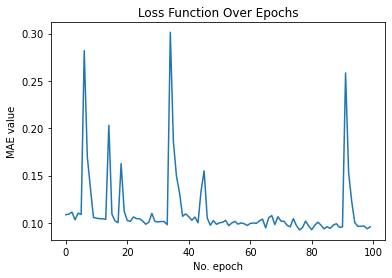

In [ ]:
plt.plot(History.history['mean_absolute_error'])
plt.title('Loss Function Over Epochs')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.show()

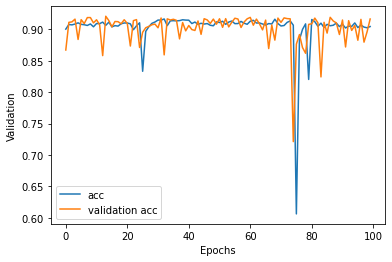

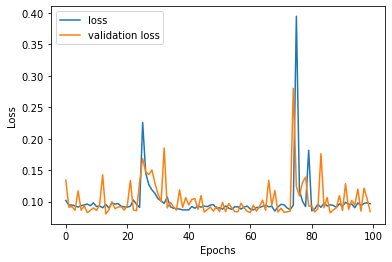

In [ ]:
plt.xlabel("Epochs")
plt.ylabel("Validation")

plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.legend(["acc", "validation acc"])
plt.show()

plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(History.history["loss"])
plt.plot(History.history["val_loss"])
plt.legend(["loss", "validation loss"], loc="upper left")
plt.show()

## 6.3. Tuning parameter

In [ ]:
def buildModel(optimizer):
    # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units = 128, activation = 'relu'))
    
    # Adding the second hidden layer
    classifier.add(Dense(units = 64, activation = 'relu'))
    
    
    classifier.add(Dense(units = 32, activation = 'relu'))
    
    # Adding the output layer
    classifier.add(Dense(units = 1, activation = 'linear'))
    
    # Compiling the ANN
    classifier.compile(loss='mean_absolute_error', optimizer='adam', metrics=['accuracy'])
    
    return classifier

In [ ]:
classifier = KerasRegressor(build_fn = buildModel)
#What hyperparameter we want to play with
parameters = {'batch_size': [16, 32, 64, 128],
              'epochs': [100, 150],
              'optimizer': ['adam', 'rmsprop']}
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'neg_mean_absolute_error',
                           cv = 5)
grid_search = grid_search.fit(x_train, y_train, verbose = 0)

<ipython-input-23-5737691192b2>:4: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  classifier = KerasRegressor(build_fn = buildModel)


In [ ]:
best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: " + str(best_parameters))

Best Parameters: {'batch_size': 64, 'epochs': 150, 'optimizer': 'adam'}


In [ ]:
bestClassifier = buildModel('adam')
HistoryBest = bestClassifier.fit(x = x_train, y = y_train,validation_data=(x_val, y_val), batch_size = 64, epochs =150 , verbose = 0)
#plt.plot(History.history['mean_absolute_error'], label='Initial Parameters')
plt.xlabel("Epochs")
plt.ylabel("Validation")

plt.plot(HistoryBest.history['accuracy'])
plt.plot(HistoryBest.history['val_accuracy'])
plt.legend(["acc", "validation acc"])
plt.show()

In [ ]:
bestClassifier.evaluate(x_val,y_val)


582/582 [==============================] - 0s 759us/step - loss: 0.0847 - mean_absolute_error: 0.0847


[0.08474957197904587, 0.08474957197904587]

## 6.4. ROC_AUC

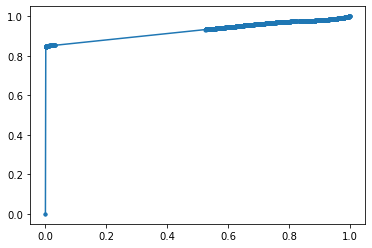

In [ ]:
HistoryBest = bestClassifier.fit(x = x_train, y = y_train,validation_data=(
        x_val, y_val), batch_size = 64, epochs =150 , verbose = 0)

y_pred = bestClassifier.predict(x_val).ravel()

nn_fpr_keras, nn_tpr_keras, nn_thresholds_keras = roc_curve(y_val, y_pred)
auc_keras = auc(nn_fpr_keras, nn_tpr_keras)
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

Text(0.5, 1.0, 'ROC_AUC Curve 0.9258')

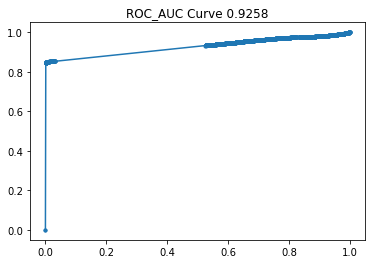

In [ ]:
plt.plot(nn_fpr_keras, nn_tpr_keras, marker='.', label='Neural Network (auc = %0.3f)' % auc_keras)

plt.title('ROC_AUC Curve '+str(round(auc_keras,4)))